In [1]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Importing the dataframe
df = pd.read_csv('C:/Users/jwhoj/Desktop/Capstone_1/KC_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Linear Regression

In [3]:
# Create the linear regressor: reg 
reg = LinearRegression()

In [4]:
# Train/test split 
from sklearn.model_selection import train_test_split  

In [5]:
# Convert dates to 1's and 0's to not affect data 
labels = df['price']
conv_dates = [1 if values == 2014 else 0 for values in df.date ]
df['date'] = conv_dates
train1 = df.drop(['id', 'price'],axis=1)

In [6]:
# Create training and test sets, train data 70% and 30% test data, randomize splitting by using random state 
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.30,random_state =2)

In [7]:
# Fit the regressor to the training data 
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
# Check score of data/how well it performed/predicted 
reg.score(x_test,y_test)

0.7069504260660421

Our aim for the machine learning portion of this project is to make a model that can give us good prediction accuracy. 
In this case, we would like good prediction accuracy on the price of the house based off different variables. We cannot 
solidly define good accuracy but we will aim for an accuracy level above 85% 

We would like to predict prices so we set labels (output) as the price column. We also convert dates to 1's and 0's 
so that they do not influence the data, error message 'cannot convert string to float' occurs if we do not do this 
conversion.

In the linear regression model above, house prices predicted an accuracy score of 70.7% This is lower than our 
aim of 85% so we will look at a different method. This method is useful for weak prediction models such as this one. 
Next we will look at gradient booting regression. 


# Gradient Boosting 

In [9]:
# Import sklearn, create variables to define gradient boosting regressor 
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [10]:
# Fit the model to the training data set 
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
# Score the accuracy of prediction on test set 
clf.score(x_test,y_test)

0.9027283460822582

Gradient boosting increased the model's predictability to 90.3%! 

# Fit a linear model

In [12]:
from sklearn.linear_model import LinearRegression
X = df.drop('price', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
# Use all predictors to fit linear regression model
lm.fit(X, df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Estimated intercept and coefficients

In [14]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 6926346.335301612


In [15]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 20


In [16]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,id,-1.294085e-06
1,date,-2.519855e-07
2,bedrooms,-3.579470e+04
3,bathrooms,4.117822e+04
4,sqft_living,1.104679e+02
5,sqft_lot,1.216144e-01
6,floors,6.770678e+03
7,waterfront,5.827074e+05
8,view,5.309522e+04
9,condition,2.628138e+04


# Predict Prices

In [17]:
# first five predicted prices
lm.predict(X)[0:5]

array([205673.27425631, 731381.84298836, 378976.34612795, 457515.36094252,
       444801.66794206])

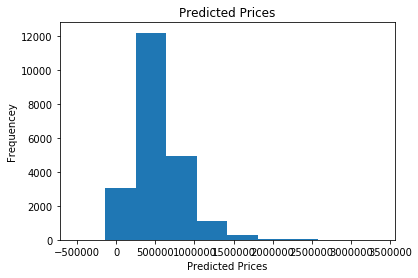

In [18]:
# your turn
plt.hist(lm.predict(X))
plt.title("Predicted Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Frequencey")
plt.show()

The above predicted prices show somewhat of a resemblance to a bell shaped curve. The midpoint of a normal distribution 
is where mean, median, mode fall. It appears slightly right skewed. 

Text(0.5, 1.0, 'Relationship between Predicted Price and Original Price')

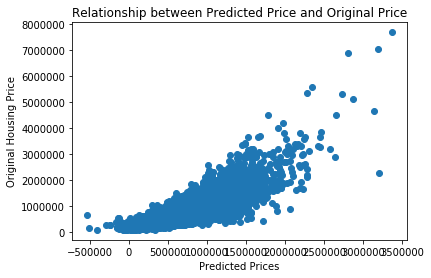

In [19]:
plt.scatter(lm.predict(X), df.price)
plt.xlabel("Predicted Prices")
plt.ylabel("Original Housing Price")
plt.title("Relationship between Predicted Price and Original Price")

The scatter plot above shows a positive correlation between predicted prices and original house prices. As predicted
house prices increase, so do original house prices. 

# Lasso Regression

Often we want to penalize the number of features in a model in order to keep the most important features, this is 
called regularization. Lasso is a common regularization technique. 

Lasso regression is used for feature selection in which is selects important features of a dataset. Lasso shrinks the
coefficients of less important features to 0. The features whose coefficients are not shrunk to 0 are 'selected' by the 
Lasso algorithm. 

The higher the alpha value, the majority of coefficients are equal to zero. As alpha values decrease (0.00001) there are 
more coefficients. We would like to find an alpha in a mid point (0.4) that will show the most important features/coeffients
while the rest are zero. 

In [20]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [21]:
# Regularization I: Lasso
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4,normalize=True)

# Fit the regressor to the data
lasso.fit(x_test,y_test)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)


[ 0.00000000e+00 -4.09832566e+04  4.11644760e+04  2.11879955e+02
  1.74516702e-01 -2.76505404e+03  7.30078750e+05  5.15715206e+04
  2.04939788e+04  9.65146047e+04 -1.94043148e+01 -6.40981313e+01
 -2.69321785e+03  1.37167676e+01 -5.79101812e+02  5.83556689e+05
 -2.27716327e+05  1.85203685e+01 -4.20028666e-01]


C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [22]:
df = df.drop(['id', 'date'], axis=1)

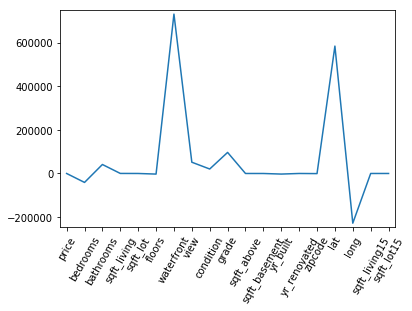

In [23]:
# Plot the coefficients
plt.plot(range(len(df.columns)), lasso_coef)
plt.xticks(range(len(df.columns)), df.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

Lasso regression above illustrates that waterfront, lat, long, grade, and number of bathrooms are the most important 
features selected by lasso regression coefficients for predicting price. 

In [24]:
y_pred = lasso.predict(x_test)

# R2 for the training set.
lasso.score(x_train, y_train)

0.6922860337937782

In [25]:
# R2 for the testing set.
lasso.score(x_test, y_test)

0.710574856095469

# RMSE

RMSE measures distance between our predicted values and actual values. How far off are our predictions? The smaller the 
value the better. 

In [26]:
# Root Mean Squared Error
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 200914.4591


R^2 for training set is 0.69 and for the testing set is 0.71 The RMSE is 200,914 dollars. This means that our model was able to 
predict every house in the test set within 200,914 dollars of the real price. 

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(x_train, y_train)

C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [28]:
print('Random Forest R squared": %.4f' % forest_reg.score(x_test, y_test))

Random Forest R squared": 0.8583


In [29]:
y_pred = forest_reg.predict(x_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 140591.1779


Random forest is a more complex model that was able to lower the RMSE from 200,914 to 140,591 dollars. Random forests 
are an ensemble (multiple learning algorithms to obtain better predictions)learning method 
for classification, regression. In short, random forest builds multiple decision trees and merges them together to 
get a more accurate and stable prediction. 

# Hyperparameter tuning with GridSearchCV

In [30]:
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

In [31]:
# Setup the hyperparameter grid
alpha_space = np.logspace(-2, 2, num=20)
param_grid = {'alpha': alpha_space}
grid = GridSearchCV(lasso, param_grid, cv=5)

grid.fit(x_train, y_train)

C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.00000e-02, 1.62378e-02, 2.63665e-02, 4.28133e-02, 6.95193e-02,
       1.12884e-01, 1.83298e-01, 2.97635e-01, 4.83293e-01, 7.84760e-01,
       1.27427e+00, 2.06914e+00, 3.35982e+00, 5.45559e+00, 8.85867e+00,
       1.43845e+01, 2.33572e+01, 3.79269e+01, 6.15848e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
y_pred = grid.predict(x_test)
# R2 for the trainig set
print('The R2 for the training set is ', grid.score(x_train, y_train))

# R2 for the test set
print('The R2 for the test set is ', grid.score(x_test, y_test))

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('The root mean squared error is $', rmse)
print('The best hyperparameter is ', grid.best_params_)

The R2 for the training set is  0.69601185195435
The R2 for the test set is  0.7069113281183053
The root mean squared error is $ 202182.04268212928
The best hyperparameter is  {'alpha': 0.7847599703514611}


Hyperparameter tuning with GridSearchCV increased R^2 for train set slightly and increased RMSE slightly. It decreased
test set from 0.7375 to 0.7320

# Ridge Regression

In [33]:
# Try Ridge regression using GridSearchCV
from sklearn.linear_model import Ridge

In [34]:
# Setup the array of alphas
alpha_space = np.logspace(-4, 0, 50)

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

param_grid = {'alpha': alpha_space}
grid = GridSearchCV(ridge, param_grid, cv=5)

grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.00000e-04, 1.20679e-04, 1.45635e-04, 1.75751e-04, 2.12095e-04,
       2.55955e-04, 3.08884e-04, 3.72759e-04, 4.49843e-04, 5.42868e-04,
       6.55129e-04, 7.90604e-04, 9.54095e-04, 1.15140e-03, 1.38950e-03,
       1.67683e-03, 2.02359e-03, 2.44205e-03, 2.94705e-03, 3.55... 3.23746e-01, 3.90694e-01,
       4.71487e-01, 5.68987e-01, 6.86649e-01, 8.28643e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
y_pred = grid.predict(x_test)
# R2 for the trainig set
print('The R2 for the training set is ', grid.score(x_train, y_train))
# R2 for the test set
print('The R2 for the testing set is ', grid.score(x_test, y_test))
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('The root mean squared error is $', rmse)
print('The best hyperparameter is ', grid.best_params_)

The R2 for the training set is  0.6959757877779691
The R2 for the testing set is  0.7066766609644928
The root mean squared error is $ 202262.96698221558
The best hyperparameter is  {'alpha': 0.009102981779915217}


In [36]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, x_test, y_test, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))



In [37]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

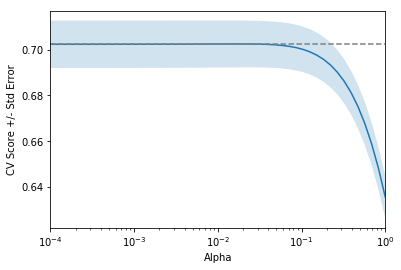

In [38]:
# Display the plot
display_plot(ridge_scores, ridge_scores_std)

# ElasticNet

In [39]:
# Import ElasticNet
from sklearn.linear_model import ElasticNet

In [40]:
# Setup the array of l1_ratio
l1_space = np.linspace(0.1, 1, 5)
alpha_space = np.logspace(-3, 0, 4)

# Create a ridge regressor: ridge
elastic = ElasticNet(normalize=True)

param_grid = {'alpha': alpha_space, 'l1_ratio': l1_space}

grid = GridSearchCV(elastic, param_grid, cv=5)

In [41]:
grid.fit(x_train, y_train)

C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jwhoj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.001, 0.01 , 0.1  , 1.   ]), 'l1_ratio': array([0.1  , 0.325, 0.55 , 0.775, 1.   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
y_pred = grid.predict(x_test)
# R2 for the trainig set
print('The R2 for the training set is ', grid.score(x_train, y_train))
# R2 for the test set
print('The R2 for the testing set is ', grid.score(x_test, y_test))
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('The root mean squared error is $', rmse)
print('The best hyperparameter is ', grid.best_params_)

The R2 for the training set is  0.6960107807733945
The R2 for the testing set is  0.7069000287520331
The root mean squared error is $ 202185.93997867263
The best hyperparameter is  {'alpha': 1.0, 'l1_ratio': 1.0}


Very similar results across the board for ElasticNet, Ridge Regression and Lasso. Linear regression appears to have the best
results for model prediction. Lasso was interesting because it visually illustrated what features are most important in 
predicting house prices. 